In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns

# Set figure size to (14,6)
plt.rcParams['figure.figsize'] = (12,5)
sns.set_theme(style='whitegrid')

x = np.linspace(0, 10, 101)

In [ ]:
#!pip install statsmodels

In [2]:
from IPython.display import IFrame
documentation = IFrame(src='https://www.statsmodels.org/stable/index.html', width=1000, height=500)
display(documentation)

# 7.1. Analysing Time Series  ⌛

### What is a time series?
* an ordered sequence of observations over time
* No independent/dependent variable - just one phenomenon being measured repeatedly over time 
  - Order of measurements is essential to time series
  - The measurements have to be at equal intervals
  - The data is not independent (weather today is not independent of weather yesterday)

#### Important Characteristics to Consider First

- Some important questions to first consider when first looking at a time series are:

- Is there a trend, meaning that, on average, the measurements tend to increase (or decrease) over time?
- Is there seasonality, meaning that there is a regularly repeating pattern of highs and lows related to calendar time such as seasons, quarters, months, days of the week, and so on?
- Are there outliers? In regression, outliers are far away from your line. With time series data, your outliers are far away from your other data.
- Is there a long-run cycle or period unrelated to seasonality factors?
- Is there constant variance over time, or is the variance non-constant?
Are there any abrupt changes to either the level of the series or the variance?

### + Trend

* Example: In the below time series, the standard deviation (how much the series "oscillates" around the mean) stays the same. There is a *linear trend* that is increasing.

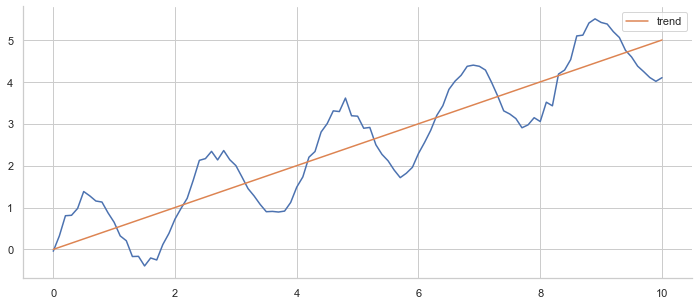

In [3]:
# Constant SD, changing mean
ts = np.sin(3*x) + 0.5*x + np.random.normal(0,0.1,101)
sns.lineplot(x=x, y=ts)
sns.lineplot(x=x, y=0.5*x,label='trend')
sns.despine()


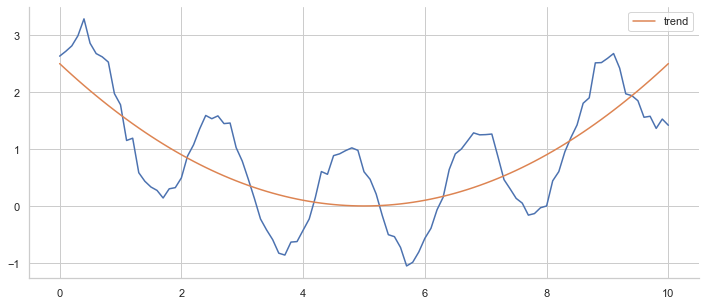

In [4]:
# Trend doesn't have to be a straight line - here we have a parabolic trend
ts = np.sin(3*x) + 0.1*(x-5)**2 + np.random.normal(0,0.1,101)
sns.lineplot(x=x, y=ts)
sns.lineplot(x=x, y=0.1*(x-5)**2, label='trend' )
sns.despine()

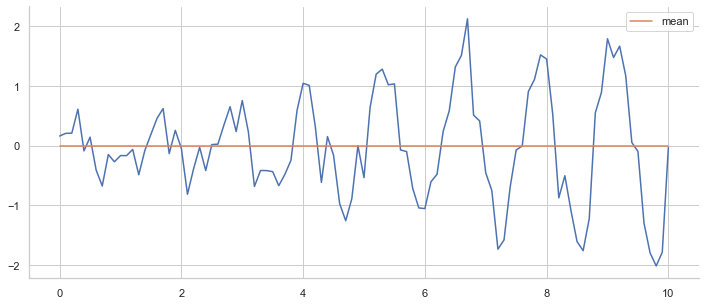

In [5]:
# Constant mean, increasing SD ('volatility')
ts2 = 0.2*x*np.sin(5*x)+np.random.normal(0, 0.3, 101)
sns.lineplot(x=x, y=ts2)
sns.lineplot(x=x, y=0, label='mean')
sns.despine()

Another example: In this time series, the mean is constant but the standard deviation is changing (increasing) over time:

### +  Seasonality

Periodic patterns in the data (eg. temperature higher in the summer, lower in winter; reported corona numbers lower at the weekend than during weekdays):

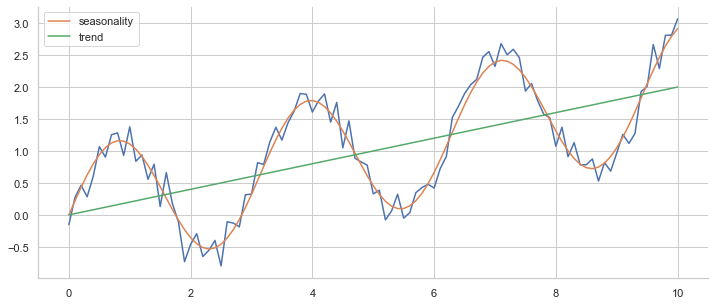

In [6]:
# Seasonality
ts3 = np.sin(2*x)+ 0.2*x + np.random.normal(0,0.2,101) #+np.random.normal(0, 2, 101)
sns.lineplot(x=x, y=ts3)
sns.lineplot(x=x, y=np.sin(2*x)+0.2*x, label='seasonality')
sns.lineplot(x=x, y=0.2*x, label='trend')
sns.despine()

* Is all that is left random noise?

All observed phenomena have some element of randomness. The question is, is there any information stored in the data that remains after seasonality and trend have been accounted for, and how do we extract this for a more accurate model?

# Time Series Decomposition

- the task of splitting a time series into components that represent specific patterns in the data
     - :
       - trend: long term increase or decrease not of a fixed frequency 
       - seasonal: seasonal effects of fixed and known frequency
       - remainder: whatever is leftover



- 

By modelling all of these underlying processes separately we can see if what remains (the remainder) contains any additional information.

#### Remainder - $R_t$

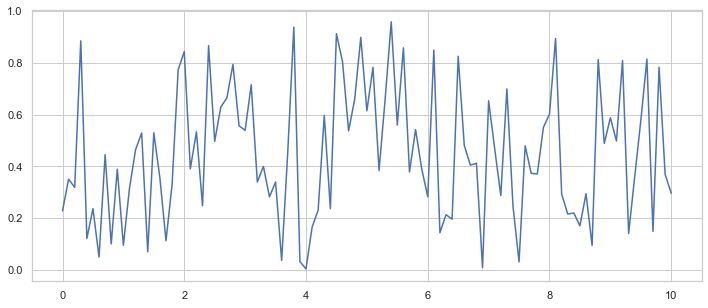

In [7]:
# 101 evenly spaced points
# randomly choosen using uniform distribution
y_random = np.random.random(101)
plt.plot(x, y_random)

#### Trend - $T_t$

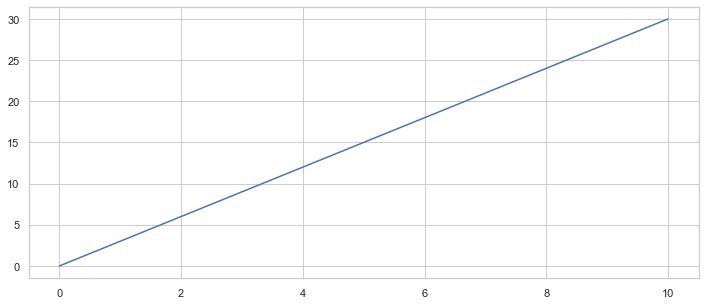

In [8]:
y_trend = x*3
plt.plot(x, y_trend)

#### Seasonality - $S_t$

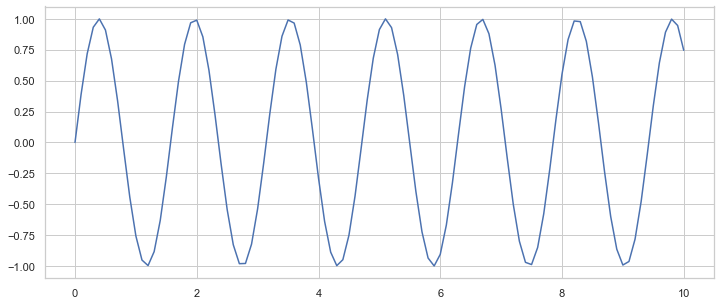

In [9]:
y_season = np.sin(x*4)
plt.plot(x, y_season)

## Different types od Time Series Decomposition

* #### Additive - suitable if the variance stays constant over time

$ y_t = S_t + T_t + R_t $

* #### Multiplicative - suitable if the variance increases/decreases over time

$ y_t = S_tT_tR_t $

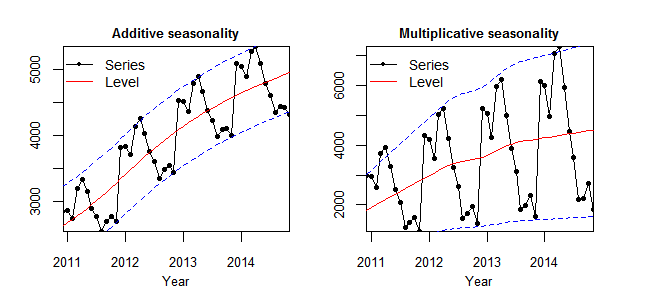

* ## Let's decompose the flights data!!

#### How we analyze time series data?
- Load the data
- Exploring the data (checking missing values,basic statistics, plotting, checking the type of the data)
- Feature engineering
- Model the trend
- Model the seasonality
- Plot together seasonality and the trend
- Extract reminder by substracting seasonality and the trend from Ts

### Step 1 - Load the Data

In [10]:
flights = pd.read_csv("./data/flights_train.csv", index_col=0, parse_dates=True)

In [11]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1949-01-01 to 1959-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   passengers  132 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB


### Step 2 - Plot the data

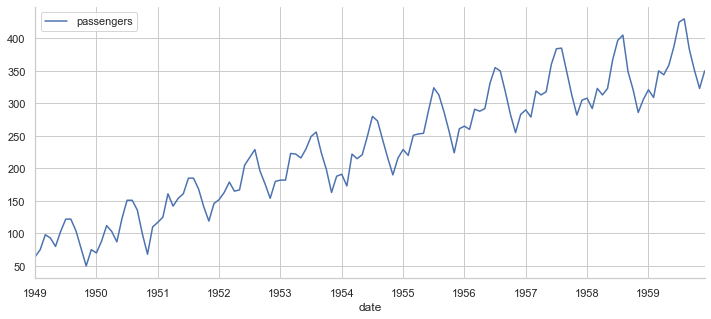

In [12]:
flights.plot()
sns.despine()

### Step 3 - Model the trend
    - use linear regression

In [13]:
# create timestep variable to model the trend using LR

flights['timestep'] = list(range(len(flights)))

In [14]:
flights.head(3)

,passengers,timestep
date,,
1949-01-01,64,0
1949-02-01,75,1
1949-03-01,98,2


In [15]:
m = LinearRegression()

In [16]:
# set timestep as X and map to y

X = flights[['timestep']]
y = flights['passengers']



In [17]:
m.fit(X, y)
# We want to fit a linear function of the timestep to our data

LinearRegression()

In [18]:
flights['trend'] = m.predict(X)
flights.head()

,passengers,timestep,trend
date,,,
1949-01-01,64,0,79.444293
1949-02-01,75,1,81.761937
1949-03-01,98,2,84.079581
1949-04-01,93,3,86.397226
1949-05-01,80,4,88.714870


### Step 4 - Plot the trend and the original data

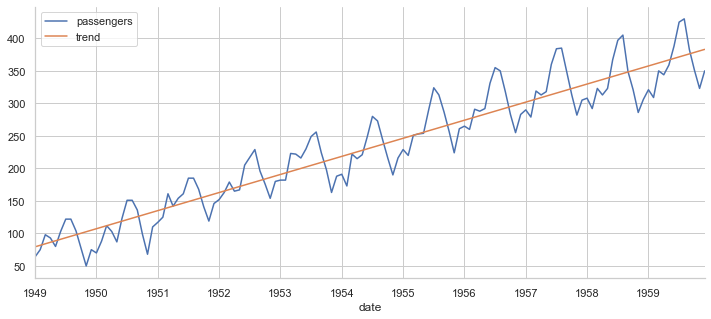

In [19]:
flights[['passengers', 'trend']].plot()
sns.despine()

#### Remove trend to see remainder with seasonality

In [20]:
flights.head()

,passengers,timestep,trend
date,,,
1949-01-01,64,0,79.444293
1949-02-01,75,1,81.761937
1949-03-01,98,2,84.079581
1949-04-01,93,3,86.397226
1949-05-01,80,4,88.714870


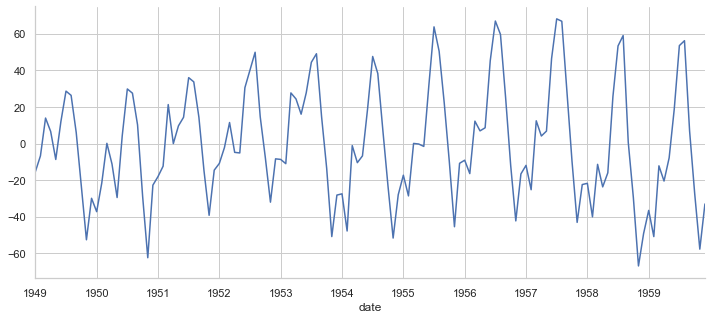

In [21]:

(flights['passengers']-flights['trend']).plot()
sns.despine()

### Step 5 - Model the seasonality

In [22]:
flights.head()

,passengers,timestep,trend
date,,,
1949-01-01,64,0,79.444293
1949-02-01,75,1,81.761937
1949-03-01,98,2,84.079581
1949-04-01,93,3,86.397226
1949-05-01,80,4,88.714870


In [23]:
flights['month'] = flights.index.month
flights.head()

,passengers,timestep,trend,month
date,,,,
1949-01-01,64,0,79.444293,1
1949-02-01,75,1,81.761937,2
1949-03-01,98,2,84.079581,3
1949-04-01,93,3,86.397226,4
1949-05-01,80,4,88.714870,5


In [24]:
# make dummy columns for months (can also do with other timeframes)

seasonal_dummies = pd.get_dummies(flights.index.month, prefix='month', drop_first=True).set_index(flights.index)
seasonal_dummies

,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
date,,,,,,,,,,,
1949-01-01,0,0,0,0,0,0,0,0,0,0,0
1949-02-01,1,0,0,0,0,0,0,0,0,0,0
1949-03-01,0,1,0,0,0,0,0,0,0,0,0
1949-04-01,0,0,1,0,0,0,0,0,0,0,0
1949-05-01,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1959-08-01,0,0,0,0,0,0,1,0,0,0,0
1959-09-01,0,0,0,0,0,0,0,1,0,0,0
1959-10-01,0,0,0,0,0,0,0,0,1,0,0


In [25]:
# add dummy columns to our flights dataframe

flights = pd.concat([flights, seasonal_dummies], axis=1)
flights.head()

,passengers,timestep,trend,month,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
date,,,,,,,,,,,,,,,
1949-01-01,64,0,79.444293,1,0,0,0,0,0,0,0,0,0,0,0
1949-02-01,75,1,81.761937,2,1,0,0,0,0,0,0,0,0,0,0
1949-03-01,98,2,84.079581,3,0,1,0,0,0,0,0,0,0,0,0
1949-04-01,93,3,86.397226,4,0,0,1,0,0,0,0,0,0,0,0
1949-05-01,80,4,88.714870,5,0,0,0,1,0,0,0,0,0,0,0


In [26]:
# to model only seasonality

X=flights.drop(columns=['passengers', 'timestep', 'trend'])

In [27]:
m.fit(X, y)

LinearRegression()

In [28]:
flights['seasonal'] = m.predict(X)

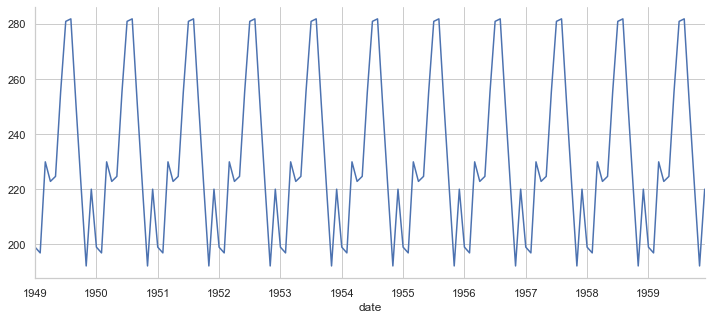

In [29]:
# plot only seasonality

flights['seasonal'].plot()
sns.despine()

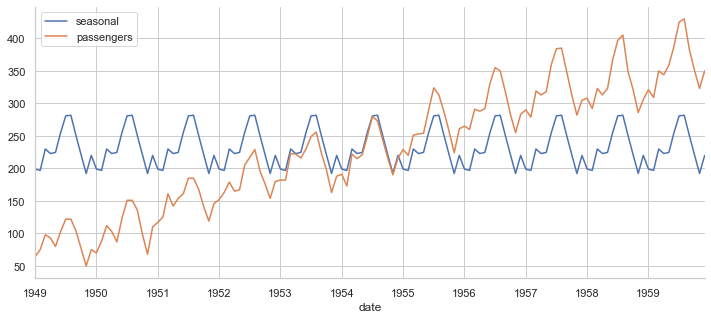

In [30]:
flights[['seasonal', 'passengers']].plot()
sns.despine()

### 5.1 Model seasonality and trend

In [31]:
X=flights.drop(columns=['passengers', 'seasonal', 'trend'])
m.fit(X, y)
flights['seasonal_trend'] = m.predict(X)

### Step 6 - Plot the original data and the trend with seasonality

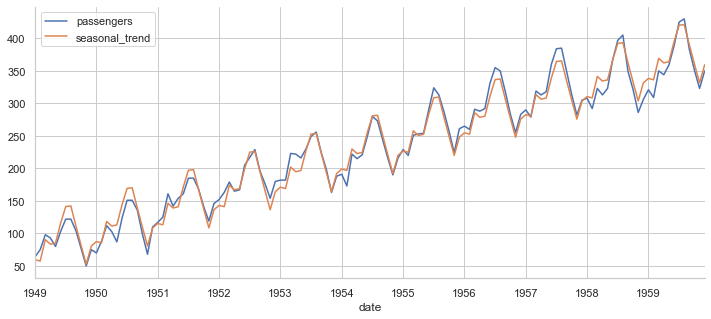

In [32]:
flights[['passengers', 'seasonal_trend']].plot()
sns.despine()

### Step 7 - Extract the remainder

* remainder = what is left after taking out trend and seasonal components

In [33]:
flights['remainder']=flights['passengers']-flights['seasonal_trend']

<AxesSubplot:title={'center':'Remainder after modeling trend and seasonality'}, xlabel='date'>

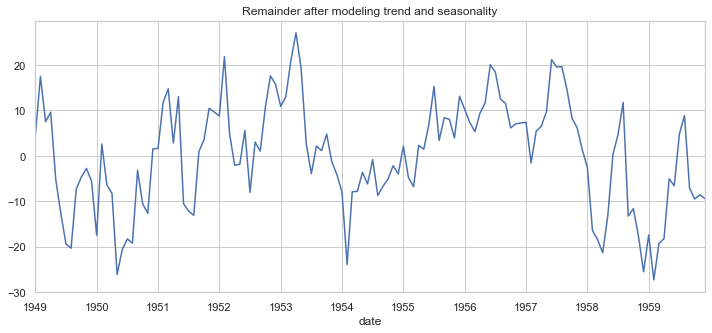

In [34]:
flights['remainder'].plot(title = 'Remainder after modeling trend and seasonality')


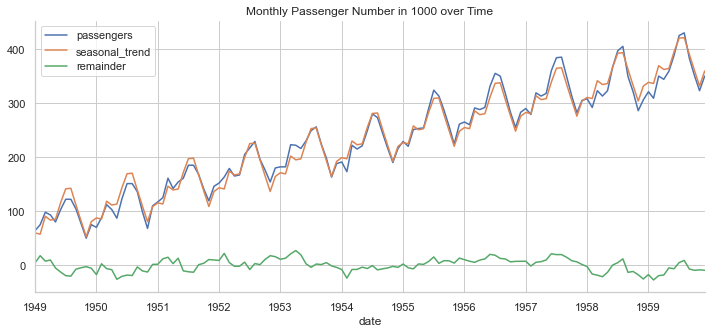

In [35]:
flights[['passengers', 'seasonal_trend', 'remainder']].plot(title='Monthly Passenger Number in 1000 over Time')
sns.despine()

##### Save the reminder for further analysis

In [36]:
flights['remainder'].to_csv('data/flights_remainder.csv')


### Step 8 - Compare the Remainder to Randomness
Create randomness array to compare

Note: even when we're create randomness, we have to define where we take those random variables from

In [37]:
random_array = np.random.normal(loc = 0, scale = 10, size = len(flights))

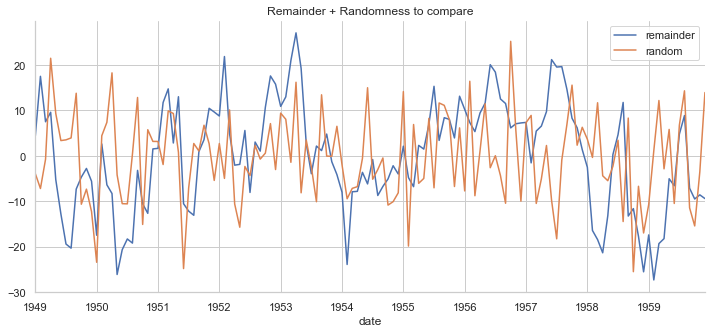

In [38]:
flights['random'] = random_array
flights[['remainder', 'random']].plot(title = 'Remainder + Randomness to compare')
sns.despine()

#### ⭐ BONUS 
* Decomposition with stats models

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose



In [40]:
sd = seasonal_decompose(flights['passengers'], model='additive')

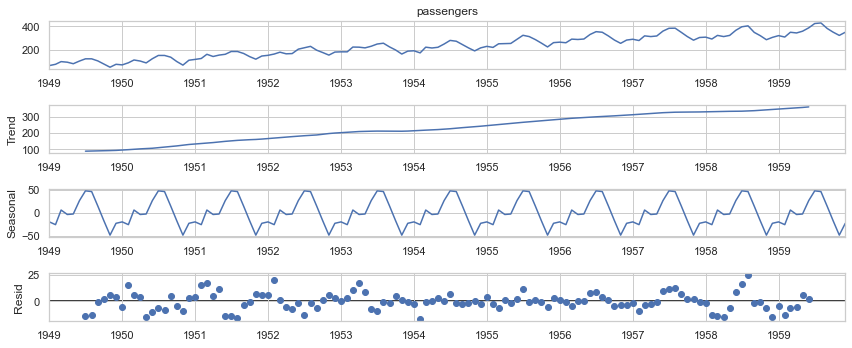

In [41]:
sd.plot()
None

## What to do from here??

- If you want look into other datasets
- Load, clean, split your data
- Run the same exercise on your data!
- Check out the challenges from the script on polynomial trends and multiplicative models


### Resources:
[Excelent youtube videos](https://www.youtube.com/watch?v=Prpu_U5tKkE)

[Different types of Time Series Decomposition](https://towardsdatascience.com/different-types-of-time-series-decomposition-396c09f92693)